In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
california_housing = fetch_california_housing()

In [3]:
california_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
california_housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [5]:
california_housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [7]:
import pandas as pd

housing_data = pd.DataFrame(california_housing.data)
housing_data

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [8]:
housing_data.describe()

,0,1,2,3,4,5,6,7
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [9]:
from scipy.stats import pearsonr

pearsonr(housing_data[0],california_housing.target)

(0.6880752079585478, 0.0)

In [10]:
from scipy.stats import pearsonr

for i in range(0,8):
    print(pearsonr(housing_data[i],california_housing.target))

(0.6880752079585478, 0.0)
(0.10562341249320994, 2.7618606761502365e-52)
(0.1519482897414578, 7.569242134631997e-107)
(-0.046700512969486865, 1.912589387207541e-11)
(-0.02464967888889489, 0.0003976307847911049)
(-0.023737412956134345, 0.0006483442370042923)
(-0.1441602768746593, 2.9398592907424878e-96)
(-0.04596661511797851, 3.923322071106899e-11)


In [11]:
import seaborn as sns

C:\Users\DEVVRAK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0'>

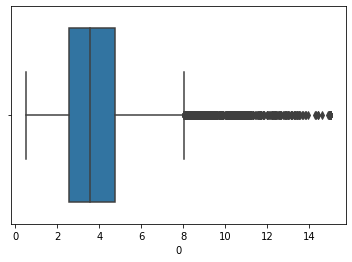

In [12]:
sns.boxplot(housing_data[0])

<AxesSubplot:xlabel='1'>

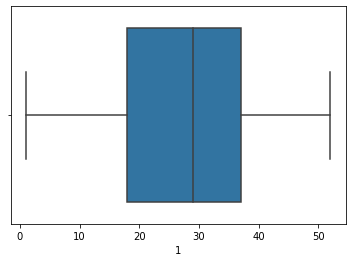

In [13]:
sns.boxplot(x = housing_data[1])

In [74]:
X = housing_data.iloc[:, 0:3]
X.shape

(20640, 3)

In [75]:
print(X)

            0     1         2
0      8.3252  41.0  6.984127
1      8.3014  21.0  6.238137
2      7.2574  52.0  8.288136
3      5.6431  52.0  5.817352
4      3.8462  52.0  6.281853
...       ...   ...       ...
20635  1.5603  25.0  5.045455
20636  2.5568  18.0  6.114035
20637  1.7000  17.0  5.205543
20638  1.8672  18.0  5.329513
20639  2.3886  16.0  5.254717

[20640 rows x 3 columns]


In [76]:
Y = california_housing.target
Y.shape

(20640,)

In [77]:
print(Y)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [78]:
x_train, x_test, y_train, y_test =train_test_split(X,Y, test_size = 0.2)

In [79]:
x_train.shape

(16512, 3)

In [80]:
x_test.shape

(4128, 3)

In [81]:
lin_regr = LinearRegression()
print(type(lin_regr))

<class 'sklearn.linear_model._base.LinearRegression'>


In [82]:
lin_regr.fit(x_train, y_train)  # training the model

LinearRegression()

In [83]:
y_pred = lin_regr.predict(x_test)
print(y_pred)

[3.33924954 1.47594782 3.23438636 ... 1.9218502  2.62512486 1.67125791]


In [84]:
y_test

array([4.058, 1.759, 1.577, ..., 2.044, 2.431, 1.257])

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean Squared error: %.2f" %mean_squared_error(y_test, y_pred))
print("Mean Absolute error: %.2f" %mean_absolute_error(y_test, y_pred))
print("R2 score: %.2f" %r2_score(y_test, y_pred))

Mean Squared error: 0.68
Mean Absolute error: 0.61
R2 score: 0.50


In [86]:
lin_regr.coef_  # printing out coefficients

array([ 0.44312696,  0.01718798, -0.02231223])

In [87]:
lin_regr.intercept_  # printing out intercept

-0.019286568462105524

In [88]:
# scaling the data

from sklearn.preprocessing import StandardScaler

X_tf = StandardScaler().fit_transform(X, y= None)
print(X_tf)

[[ 2.34476576  0.98214266  0.62855945]
 [ 2.33223796 -0.60701891  0.32704136]
 [ 1.7826994   1.85618152  1.15562047]
 ...
 [-1.14259331 -0.92485123 -0.09031802]
 [-1.05458292 -0.84539315 -0.04021111]
 [-0.78012947 -1.00430931 -0.07044252]]


In [89]:
x_train, x_test, y_train, y_test =train_test_split(X_tf,Y, test_size = 0.2)

In [92]:
sgd_regr = SGDRegressor(max_iter = 1000, eta0 = 0.05, learning_rate = 'invscaling', alpha = 0.01)
sgd_regr.fit(x_train, y_train)

SGDRegressor(alpha=0.01, eta0=0.05)

In [93]:
sgd_regr.n_iter_

8

In [94]:
y_pred = sgd_regr.predict(x_test)
y_pred

array([1.77734597, 2.38265499, 3.50419816, ..., 1.93694803, 2.26728642,
       1.98071305])

In [95]:
y_test

array([1.491, 1.839, 4.167, ..., 1.582, 4.259, 2.039])

In [96]:
sgd_regr.coef_

array([0.76614036, 0.20510607, 0.11592901])

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean Squared error: %.2f" %mean_squared_error(y_test, y_pred))
print("Mean Absolute error: %.2f" %mean_absolute_error(y_test, y_pred))
print("R2 score: %.2f" %r2_score(y_test, y_pred))

Mean Squared error: 0.69
Mean Absolute error: 0.61
R2 score: 0.48


# Diabetes dataset

In [134]:
from sklearn.datasets import load_diabetes

In [135]:
diab_data = load_diabetes()
diab_data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [136]:
diab_data.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [137]:
diab_data.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [138]:
import pandas as pd

diab_data_df = pd.DataFrame(diab_data.data)
diab_data_df

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [139]:
diab_data_df.describe()

,0,1,2,3,4,5,6,7,8,9
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [140]:
from scipy.stats import pearsonr

for i in range(0,8):
    print(pearsonr(diab_data_df[i],diab_data.target))

(0.1878887507189198, 7.055686149112759e-05)
(0.043061998451605396, 0.3664292946517888)
(0.5864501344746886, 3.4660064451655095e-42)
(0.44148384893088605, 1.6485327478610998e-22)
(0.21202248101455068, 6.920711787756615e-06)
(0.17405358696874246, 0.00023598480959842948)
(-0.3947892506709184, 6.1628646951821016e-18)
(0.43045288474477306, 2.3042532817527275e-21)


# Diabetes dataset Lin_Regr

In [141]:
X = diab_data_df
X.shape

(442, 10)

In [142]:
print(X)

            0         1         2         3         4         5         6  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

            7         8         9  
0   -0.002592  0.019908 -0.017646  
1  

In [143]:
Y = diab_data.target
Y.shape

(442,)

In [144]:
x_train, x_test, y_train, y_test =train_test_split(X,Y, test_size = 0.2)

In [145]:
x_train.shape

(353, 10)

In [146]:
x_test.shape

(89, 10)

In [147]:
lin_regr = LinearRegression()
lin_regr.fit(x_train, y_train)
y_pred = lin_regr.predict(x_test)
print(y_pred)

[113.09096931 220.59433336  52.15876577 201.5798511  211.37680186
 154.01384394 288.58359191 114.17514356 139.11066063 169.22372754
 250.58363848 161.96272317 234.41556506 188.10416696 115.30780592
  95.74966352 200.44210602 251.92629735 142.42063784 167.49985299
  61.04129553 120.57549711 155.76551913 181.98992323 192.03715818
 191.15287268 209.71479151 140.07784054 259.2236487  191.31395776
  72.46234576 104.12416863 112.98043056  67.31335244 118.82440028
  45.07166064 186.0194753  189.0342146   48.13722535  99.5215229
 123.64296376 101.40101383 171.58118754  37.57394104 149.19793668
 264.55707718 207.92138697 147.7583168   71.29305286 166.26547759
 205.75443821 108.65696852 160.69324763 233.42262342 160.83282298
  63.66492913 176.72215151 207.81729044 149.97398647 221.88698705
 165.74167388  88.03921708 107.65656061 112.99712827 123.06024144
 225.86230778 231.5488287  206.335938   201.37731321 133.69830868
  77.94116371 218.53572573  69.7982083  181.18218411 130.85743451
 206.796794

In [148]:
print(y_test)

[107. 225.  65. 189. 310.  85. 270.  64.  81.  84. 132. 109. 272. 122.
  69. 102. 197. 275. 142. 225. 143. 145. 259. 257. 292. 232. 265. 230.
 242. 202.  59. 118. 109. 104. 127.  72. 229. 292.  90. 104. 135.  81.
 244. 104. 219. 303. 220. 172. 200. 131. 198. 199. 245. 275. 127. 158.
 141. 268. 252. 257. 216.  93. 108.  96.  66. 295. 280. 249. 233. 146.
  71. 155. 138.  90.  59. 150.  72.  73. 279. 183.  52.  67. 144.  91.
  59.  65. 273. 102.  85.]


In [149]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean Squared error: %.2f" %mean_squared_error(y_test, y_pred))
print("Mean Absolute error: %.2f" %mean_absolute_error(y_test, y_pred))
print("R2 score: %.2f" %r2_score(y_test, y_pred))

Mean Squared error: 3245.27
Mean Absolute error: 46.57
R2 score: 0.46


# Diabetes dataset SGD regr

In [150]:
# scaling the data

from sklearn.preprocessing import StandardScaler

X_tf = StandardScaler().fit_transform(X, y= None)
print(X_tf)

[[ 0.80050009  1.06548848  1.29708846 ... -0.05449919  0.41855058
  -0.37098854]
 [-0.03956713 -0.93853666 -1.08218016 ... -0.83030083 -1.43655059
  -1.93847913]
 [ 1.79330681  1.06548848  0.93453324 ... -0.05449919  0.06020733
  -0.54515416]
 ...
 [ 0.87686984  1.06548848 -0.33441002 ... -0.23293356 -0.98558469
   0.32567395]
 [-0.9560041  -0.93853666  0.82123474 ...  0.55838411  0.93615545
  -0.54515416]
 [-0.9560041  -0.93853666 -1.53537419 ... -0.83030083 -0.08871747
   0.06442552]]


In [151]:
x_train, x_test, y_train, y_test =train_test_split(X_tf,Y, test_size = 0.2)

In [152]:
sgd_regr = SGDRegressor(max_iter = 1000, eta0 = 0.05, learning_rate = 'invscaling', alpha = 0.01)
sgd_regr.fit(x_train, y_train)

SGDRegressor(alpha=0.01, eta0=0.05)

In [153]:
sgd_regr.n_iter_

8

In [154]:
y_pred = sgd_regr.predict(x_test)
y_pred

array([165.97330386, 188.79770613, 158.22176386, 124.12232699,
       168.251931  , 236.06178657,  60.72713985, 113.06851577,
       175.06199727, 243.56857933, 219.62817632, 165.85726115,
        99.50465537, 148.63434037, 186.66902965, 113.66493968,
        83.54921042, 109.95047066, 102.15943755, 128.53967885,
       196.17317647, 136.79887499, 220.24790129,  67.06901219,
       186.15633214, 155.10326105, 137.46347244, 186.43680371,
        86.04695404, 123.3825673 , 195.00120645, 202.41695484,
       148.89036348, 209.26745239, 180.92417244,  98.49303369,
       217.13572828, 145.7776138 , 177.04077174, 176.08087774,
       218.97930178, 171.88585404, 112.73998486, 237.76266091,
        82.69109865, 232.94114997,  65.61537193, 131.80029884,
       143.62029957, 177.60858055, 160.59364511, 199.50977955,
       210.85670241,  98.15199005, 229.64981093,  93.09180146,
       164.33331112, 121.47669903, 104.73797361, 206.94720262,
       119.39838085, 151.87214072, 165.53351507, 110.55

In [155]:
y_test

array([265., 161., 196.,  66., 122., 195.,  65., 160., 107., 275., 232.,
       111.,  31., 252., 144.,  53.,  48.,  61., 104., 131., 221., 168.,
       249.,  83., 217., 100., 172., 175.,  53.,  51.,  48., 288., 302.,
       150.,  84.,  53., 189.,  50.,  91., 131., 197., 174., 118., 270.,
        92., 280.,  96.,  90., 116., 181., 185., 272., 275.,  54., 261.,
       201., 134.,  67., 125., 297., 145., 151., 121., 102.,  90., 264.,
        99., 310., 116.,  80., 183.,  63., 156., 259., 178.,  84., 135.,
       170., 122., 109., 243., 208., 220.,  88., 200., 310.,  45.,  83.,
       202.])

In [156]:
sgd_regr.coef_

array([  1.24056483, -12.31848391,  20.86435576,  16.67483393,
        -8.76511476,   1.00903555,  -3.7748206 ,   8.36611934,
        26.83728383,   2.0060243 ])

In [157]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean Squared error: %.2f" %mean_squared_error(y_test, y_pred))
print("Mean Absolute error: %.2f" %mean_absolute_error(y_test, y_pred))
print("R2 score: %.2f" %r2_score(y_test, y_pred))

Mean Squared error: 2827.28
Mean Absolute error: 42.90
R2 score: 0.52


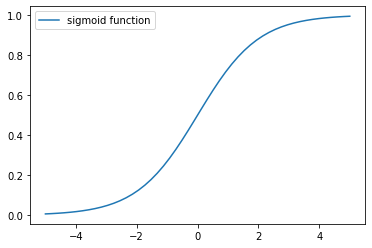

In [166]:
x= np.linspace(-5,5,50)
def sigmoid(x):
    return 1/(1+np.exp(-x))

plt.plot(x,sigmoid(x),label = 'sigmoid function')
plt.legend()
plt.show()

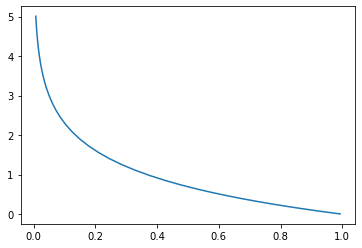

In [169]:
plt.plot(sigmoid(x),-np.log(sigmoid(x)))
plt.show()

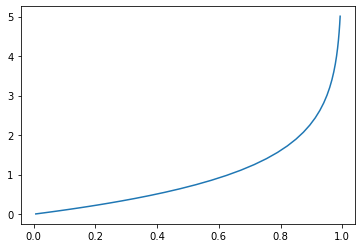

In [170]:
plt.plot(sigmoid(x),-np.log(1-sigmoid(x)))
plt.show()